<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/5_Logistic_Regression_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  1.1.1 Logistic Function (aka, Sigmoid Function) :  
$$P(y=1|X) = \frac{1}{1+e^{-z}}$$


$$\text where $$

$$ z = \beta_0 + \beta_1X$$

In [3]:
x=np.arange(10)

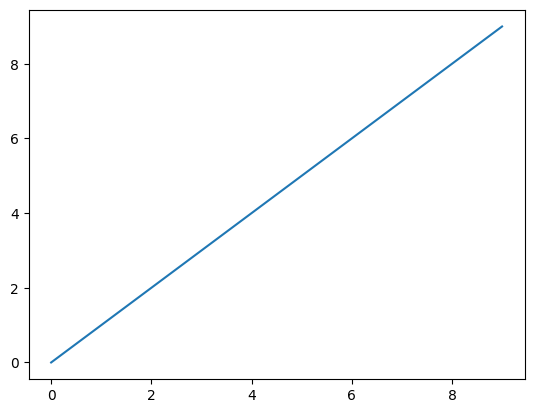

In [4]:
plt.plot(x)

In [5]:
z=np.linspace(-10, 10, 100)
sig= 1/(1+np.exp(-z))

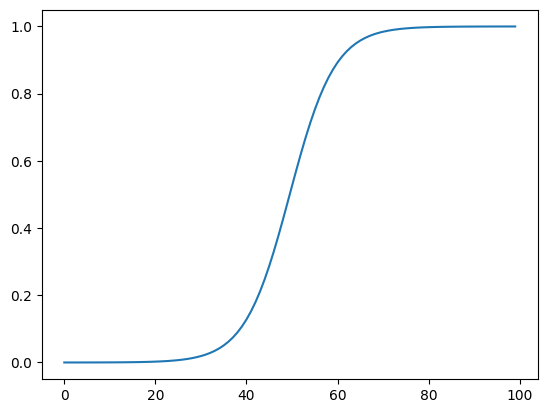

In [6]:
plt.plot(sig)

### 1.1.2 Why the Decision Boundary is set at $z=0$

The model predicts the probability of a sample belonging to Class 1 using the Sigmoid function:

$$P(y=1|X) = \sigma(z) = \frac{1}{1+e^{-z}}$$

By default, we classify an observation as Class 1 if the probability is **0.5 or higher**. The 'Decision Boundary' is the specific threshold where the probability is exactly 0.5.

1. **Set the probability to 0.5**:
   $$\frac{1}{1+e^{-z}} = 0.5$$

2. **Take the reciprocal of both sides**:
   $$1+e^{-z} = \frac{1}{0.5} = 2$$

3. **Isolate the exponential term**:
   $$e^{-z} = 1$$

4. **Apply the natural logarithm (ln) to both sides**:
   $$\ln(e^{-z}) = \ln(1)$$
   $$-z = 0$$
   $$z = 0$$


Since $z = \beta_0 + \beta_1X$, the decision boundary is defined by the line (or hyperplane) where $\beta_0 + \beta_1X = 0$.
- If $z > 0$, then $P > 0.5$, and we predict **Class 1**.
- If $z < 0$, then $P < 0.5$, and we predict **Class 0**.

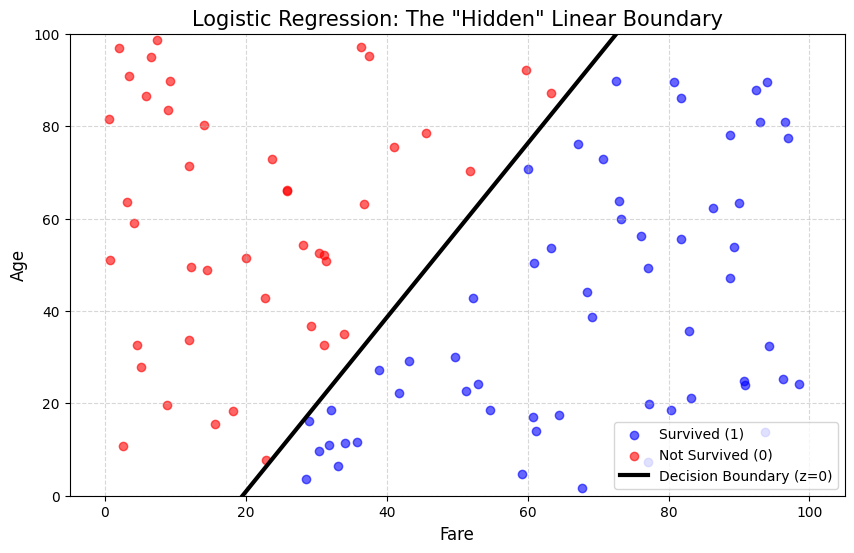

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data (Fare, Age)
np.random.seed(42)
X = np.random.rand(100, 2) * 100  # 100 samples of Fare and Age
# Determine survival based on a simple rule (higher Fare and lower Age increase survival probability)
y = (X[:, 0] * 0.1 - X[:, 1] * 0.05 > 2).astype(int)

# 2. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 3. Calculate Decision Boundary
# Finding points where z = b0 + b1*X1 + b2*X2 = 0 gives a straight line.
# X2 = -(b1/b2)*X1 - (b0/b2)
b0 = model.intercept_[0]
b1, b2 = model.coef_[0]

x1_range = np.linspace(0, 100, 100)
x2_boundary = -(b1 / b2) * x1_range - (b0 / b2)

# 4. Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Survived (1)', alpha=0.6)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Not Survived (0)', alpha=0.6)

plt.plot(x1_range, x2_boundary, color='black', linewidth=3, label='Decision Boundary (z=0)')

plt.title('Logistic Regression: The "Hidden" Linear Boundary', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 2 Import Dataset, titanic

In [ ]:
# prompt: get titanic dataset from sns
data=pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/main/ml/titanic.csv")

In [ ]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


## 3 Checking titanic

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

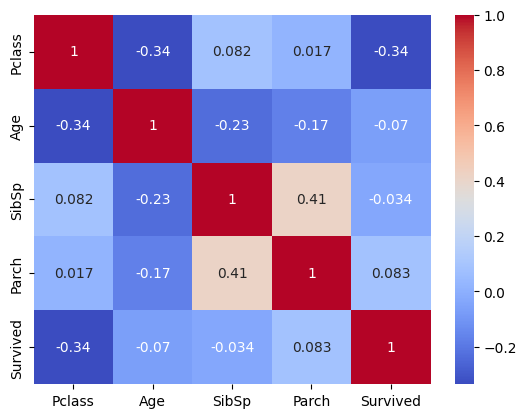

In [ ]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True)

## 4 Preprocessing: Converting Categorical Variables (Dummy Variables and One-Hot Encoding)

In [ ]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


In [ ]:
titanic = data.drop(['Name','Ticket'], axis=1)
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [ ]:
# We use dummy coding (instead of one hot encoding this time by setting drop_first=True)
titanic_dum=pd.get_dummies(titanic, columns = ['Sex','Embarked'], drop_first=True)


In [ ]:
titanic_dum

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


## 5 Modeling and Predicting

In [ ]:
from sklearn.model_selection import train_test_split

X = titanic_dum.drop('Survived', axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr.fit?

Object `lr.fit` not found.


In [ ]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
776,3,5.0,0,0,False,False,True
781,1,29.0,0,0,True,False,True


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict category
pred = lr.predict(X_test)

In [ ]:
# to obtain actual probablities
lr.predict_proba(X_test)

array([[0.92552334, 0.07447666],
       [0.37707074, 0.62292926],
       [0.92227876, 0.07772124],
       [0.44994828, 0.55005172],
       [0.88488134, 0.11511866],
       [0.18729717, 0.81270283],
       [0.9071155 , 0.0928845 ],
       [0.79491173, 0.20508827],
       [0.89851031, 0.10148969],
       [0.34917409, 0.65082591],
       [0.37012255, 0.62987745],
       [0.44692941, 0.55307059],
       [0.64980908, 0.35019092],
       [0.26687483, 0.73312517],
       [0.08277617, 0.91722383],
       [0.88459445, 0.11540555],
       [0.83809281, 0.16190719],
       [0.6059575 , 0.3940425 ],
       [0.67890858, 0.32109142],
       [0.88488134, 0.11511866],
       [0.25098584, 0.74901416],
       [0.25402495, 0.74597505],
       [0.92541727, 0.07458273],
       [0.95904087, 0.04095913],
       [0.05462083, 0.94537917],
       [0.18674171, 0.81325829],
       [0.29092997, 0.70907003],
       [0.90016914, 0.09983086],
       [0.93769258, 0.06230742],
       [0.67158662, 0.32841338],
       [0.

## 6 Evaluating Prediction Models

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [ ]:
pd.Series(lr.coef_[0], index = X.columns)

Pclass       -1.181867
Age          -0.039904
SibSp        -0.320768
Parch         0.008051
Sex_male     -2.568368
Embarked_Q   -0.074879
Embarked_S   -0.237307
dtype: float64

## 7 Apply some Feature Engineering

In [ ]:
titanic_dum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Survived', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
titanic_dum['family'] = titanic_dum['SibSp'] + titanic_dum['Parch'] # sibling & spouse + Parent & child

In [ ]:
titanic_dum.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,1,0,0,True,False,True,1
1,1,38.0,1,0,1,False,False,False,1
2,3,26.0,0,0,1,False,False,True,0
3,1,35.0,1,0,1,False,False,True,1
4,3,35.0,0,0,0,True,False,True,0


In [ ]:
# Dose the prediction accuracy improved by 'engineering' "family variable?"
X = titanic_dum.drop(['Survived','SibSp','Parch'], axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

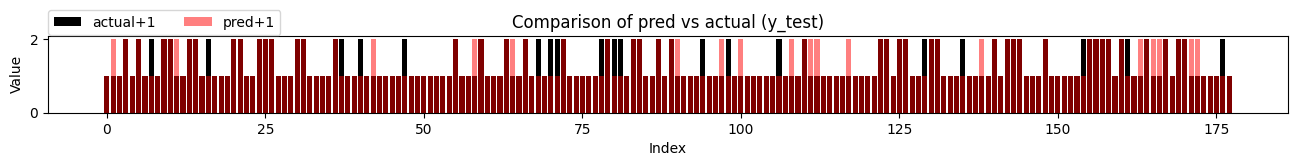

In [ ]:
# visualize the predicted performance: pink (false positive) and black (fasle nagative) bars represents incorrect prediction

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 1))

plt.bar(range(len(y_test)), y_test+1, label='actual+1', color='black')
plt.bar(range(len(pred)), (pred+1), label='pred+1', color='red', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of pred vs actual (y_test)')
plt.legend(ncol=3, loc=(0,1.01))
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       114
           1       0.71      0.70      0.71        64

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



| Metric | Intuitive Meaning | Formula (based on TP, FP, FN, TN) | Focus |
| :--- | :--- | :--- | :--- |
| **Accuracy** | "The Overall Score" | `(TP + TN) / (TP + TN + FP + FN)` | How many predictions were correct **overall**? |
| **Precision** | "Reliability of Positive Predictions" | `TP / (TP + FP)` | Of those predicted "Positive," how many were real? (Focuses on reducing FP) |
| **Recall** | "Ability to Find All Positives" | `TP / (TP + FN)` | Of the actual "Positives," how many were found? (Focuses on reducing FN) |
| **F1-Score** | "The Balanced Score" | `2 * (Precision * Recall) / (Precision + Recall)` | Are both Precision and Recall high? |
